In [3]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h1> Extracting Water Level<h1>

In [4]:
##Water level of Vlotho
start=0
file1 = open('Vlotho/Vlotho-W.zrx', 'r')
wlevels_dates=file1.readlines()
file1.close()

water_extractor=lambda t: (t[15:19])
date_extractor=lambda t: (t[0:8])
wlevels=[water_extractor(level) for level in wlevels_dates]
wlevels=np.array(wlevels[start:]).astype(float)
dates=[date_extractor(date) for date in wlevels_dates]
dates=np.array(dates[start:]).astype(int)
wlevels=np.array(wlevels)


<h1> Extracting Tidal Height

In [5]:
file=open('Vlotho/tidaldata.bsh')
data=file.readlines()
file.close()
tidal_date_extractor=lambda t: (t[0:10])
tidal_extractor=lambda t: (float(t[18:22]))
dates_tidal=[tidal_date_extractor(date) for date in data]
tidal_heights=[tidal_extractor(tide) for tide in data]
# print(dates_tidal)
tidal_df = pd.DataFrame(
    {'date': dates_tidal,
     'tidal heights': tidal_heights
    })


tidal_df=tidal_df.groupby('date')['tidal heights'].mean()
tidalheights=tidal_df.values


<h1> Data Analysis

In [6]:
def analysedata(filepath):
  result=dict()
  df=pd.read_csv(filepath,sep=';')
  start=df[df["MESS_DATUM"]==20000101].index[0]
  stop=df[df["MESS_DATUM"]==20201231].index[0]

  ppt=df[" RSK"][start:(stop+1)].to_numpy()
  meanwind=df["  FM"][start:stop+1].to_numpy()
  maxwindgust=df["  FX"][start:stop+1].to_numpy()
  meanwind=df["  FM"][start:stop+1].to_numpy()
  meantemp=df[" TMK"][start:stop+1].to_numpy()
  vappressure=df[" VPM"][start:stop+1].to_numpy()
  sdepth=df["SHK_TAG"][start:stop+1].to_numpy()
  rhumidity=df[" UPM"][start:stop+1].to_numpy()
  meanpressure=df["  PM"][start:stop+1].to_numpy()
  cloudcover=df["  NM"][start:stop+1].to_numpy()
  date=df["MESS_DATUM"][start:stop+1].to_numpy()


  result["place"]=filepath[12:-4]
  result["lengthofdata"]=len(ppt)

  missingdates=set(dates)-set(date)

  result["missing_rain"]=np.count_nonzero(ppt==-999)
  result["missing_dates"]=missingdates
  result["missing_mean_wind"]=np.count_nonzero(meanwind==-999)
  result["missing_max_wind_gust"]=np.count_nonzero(maxwindgust==-999)
  result["missing_mean_temp"]=np.count_nonzero(meantemp==-999)
  result["missing_vapour_pressure"]=np.count_nonzero(vappressure==-999)
  result["missing_snow_depth"]=np.count_nonzero(sdepth==-999)
  result["missing_relative_humidity"]=np.count_nonzero(rhumidity==-999)
  result["missing_mean_pressure"]=np.count_nonzero(meanpressure==-999)
  result["missing_cloud_cover"]=np.count_nonzero(cloudcover==-999)
  result["missing_relative_humidity"]=np.count_nonzero(rhumidity==-999)

  return(result)

badsalzuflendata=analysedata('./Vlotho/badsalzuflen.txt')##good
braunlagedata=analysedata('./Vlotho/braunlage.txt')##good
brockendata=analysedata('./Vlotho/brocken.txt')#good
gottingendata=analysedata('./Vlotho/gottingen.txt')#good
lippspringedata=analysedata('./Vlotho/lippspringe.txt')#good

<h1> Keeping available data <h1>

In [7]:
threshold=1000
def choosecols(filepath):
  takencols=["MESS_DATUM"]
  res=analysedata(filepath)
  if res["missing_rain"]<threshold:
    takencols.append("Precipitation Height/(mm)")
  if res["missing_mean_wind"]<threshold:
    takencols.append("Mean Wind Speed/(m/s)")
  if res["missing_max_wind_gust"]<threshold:
    takencols.append("Max Wind Gust/(m/s)")
  if res["missing_mean_temp"]<threshold:
    takencols.append("Mean Temperature/(C)")
  if res["missing_vapour_pressure"]<threshold:
    takencols.append("Vapour Pressure/(hPa)")
  if res["missing_snow_depth"]<threshold:
    takencols.append("Snow Depth/(cm)")
  if res["missing_relative_humidity"]<threshold:
    takencols.append("Relative Humidity/(%)")
  if res["missing_mean_pressure"]<threshold:
    takencols.append("Mean Pressure/(hPa)")
  if res["missing_cloud_cover"]<threshold:
    takencols.append("Cloud Cover/(oktas)")
  return takencols

badsalzuflen_cols=choosecols("./Vlotho/badsalzuflen.txt")
braunlage_cols=choosecols("./Vlotho/braunlage.txt")
brocken_cols=choosecols("./Vlotho/brocken.txt")
lippspringe_cols=choosecols("./Vlotho/lippspringe.txt")
gottingen_cols=choosecols("./Vlotho/gottingen.txt")


<h1> Renaming columns and data cleaning <h1>


In [8]:
def renamecols(filepath):
  df=pd.read_csv(filepath,sep=';')
  df.rename(columns={'  FX':'Max Wind Gust/(m/s)',
                     '  FM':'Mean Wind Speed/(m/s)',
                     ' RSK':'Precipitation Height/(mm)',
                     ' TMK':'Mean Temperature/(C)',
                     '  PM':'Mean Pressure/(hPa)',
                     ' VPM':'Vapour Pressure/(hPa)',
                     'SHK_TAG':'Snow Depth/(cm)',
                     ' UPM':'Relative Humidity/(%)',
                     '  NM':'Cloud Cover/(oktas)'}, inplace=True)
  return df
badsalzuflen_df=renamecols("./Vlotho/badsalzuflen.txt")
braunlage_df=renamecols("./Vlotho/braunlage.txt")
brocken_df=renamecols("./Vlotho/brocken.txt")
gottingen_df=renamecols("./Vlotho/gottingen.txt")
lippspringe_df=renamecols("./Vlotho/lippspringe.txt")



def takecols(df,feat):
    start=df[df["MESS_DATUM"]==20000101].index[0]
    stop=df[df["MESS_DATUM"]==20201231].index[0]
    df=df.iloc[start:stop+1]
    idx=[i for i in range(len(df))]
    new_df=df[feat].copy()
    new_df["idx"]=idx
    new_df=new_df.set_index('idx')
    new_df=new_df.replace(-999,np.nan)
    return(new_df)


badsalzuflen_df_scols=takecols(badsalzuflen_df,choosecols("./Vlotho/badsalzuflen.txt"))
braunlage_df_scols=takecols(braunlage_df,choosecols("./Vlotho/braunlage.txt"))
brocken_df_scols=takecols(brocken_df,choosecols("./Vlotho/brocken.txt"))
gottingen_df_scols=takecols(gottingen_df,choosecols("./Vlotho/gottingen.txt"))
lippspringe_df_scols=takecols(lippspringe_df,choosecols("./Vlotho/lippspringe.txt"))


In [9]:
badsalzuflen_df_scols_imp = badsalzuflen_df_scols.interpolate(method="linear",limit_direction ='forward')
braunlage_df_scols_imp = braunlage_df_scols.interpolate(method="linear",limit_direction ='forward')
brocken_df_scols_imp = brocken_df_scols.interpolate(method="linear",limit_direction ='forward')

gottingen_df_scols_imp = gottingen_df_scols.interpolate(method="linear",limit_direction ='forward')
lippspringe_df_scols_imp = lippspringe_df_scols.interpolate(method="linear",limit_direction ='forward')



<h1> Creating Lagged Features<h1>

In [10]:
def buildLaggedFeatures(s,lag=2,dropna=True):
  if type(s) is pd.DataFrame:
      new_dict={}
      for col_name in s:
          new_dict[col_name]=s[col_name]
          # create lagged Series
          for l in range(1,lag+1):
              new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
      res=pd.DataFrame(new_dict,index=s.index)

  elif type(s) is pd.Series:
      the_range=range(lag+1)
      res=pd.concat([s.shift(i) for i in the_range],axis=1)
      res.columns=['lag_%d' %i for i in the_range]
  else:
      print('Only works for DataFrame or Series')
      return None
  if dropna:
      return res.dropna()
  else:
      return res 

Simple Data for LSTM

In [11]:
df_concat_cols_lstm = pd.concat([badsalzuflen_df_scols_imp, braunlage_df_scols_imp,brocken_df_scols_imp,gottingen_df_scols_imp,lippspringe_df_scols_imp], axis=1)
dates=(df_concat_cols_lstm.pop("MESS_DATUM"))
df_mean_cols_lstm=df_concat_cols_lstm.groupby(by=df_concat_cols_lstm.columns, axis=1).mean()
df_mean_cols_lstm["Tidal Height/(m)"]=tidalheights
df_mean_cols_lstm["Water Level/(cm)"]=wlevels

df_mean_cols_lstm_wlevels=df_mean_cols_lstm.copy()

df_mean_cols_wlevels_lag=buildLaggedFeatures(df_mean_cols_lstm_wlevels,3)




In [12]:
maxlag=55
badsalzuflen_lagged=buildLaggedFeatures(badsalzuflen_df_scols_imp,maxlag,False)
braunlage_lagged=buildLaggedFeatures(braunlage_df_scols_imp,maxlag,False)
brocken_lagged=buildLaggedFeatures(brocken_df_scols_imp,maxlag,False)
gottingen_lagged=buildLaggedFeatures(gottingen_df_scols_imp,maxlag,False)
lippspringe_lagged=buildLaggedFeatures(lippspringe_df_scols_imp,maxlag,False)


badsalzuflen_lagged_new=badsalzuflen_lagged.iloc[maxlag:]
braunlage_lagged_new=braunlage_lagged.iloc[maxlag:]
brocken_lagged_new=brocken_lagged.iloc[maxlag:]
gottingen_lagged_new=gottingen_lagged.iloc[maxlag:]
lippspringe_lagged_new=lippspringe_lagged.iloc[maxlag:]


<h1> Concatenating the lagged featured dataframes

In [13]:
df_concat_cols = pd.concat([badsalzuflen_lagged_new,braunlage_lagged_new,brocken_lagged_new,gottingen_lagged_new,lippspringe_lagged_new], axis=1)
datecols=["MESS_DATUM_lag"+str(i) for i in range(1,maxlag+1)]

for date in datecols:
  dates=df_concat_cols.pop(date)
df_concat_cols.pop("MESS_DATUM")


,MESS_DATUM,MESS_DATUM,MESS_DATUM,MESS_DATUM,MESS_DATUM
idx,,,,,
55,20000225,20000225,20000225,20000225,20000225
56,20000226,20000226,20000226,20000226,20000226
57,20000227,20000227,20000227,20000227,20000227
58,20000228,20000228,20000228,20000228,20000228
59,20000229,20000229,20000229,20000229,20000229
...,...,...,...,...,...
7666,20201227,20201227,20201227,20201227,20201227
7667,20201228,20201228,20201228,20201228,20201228
7668,20201229,20201229,20201229,20201229,20201229


<h1> Mean over respective lags <h1>

In [14]:
df_mean_cols=df_concat_cols.groupby(by=df_concat_cols.columns, axis=1).mean()
df_mean_cols["Water Level/(cm)"]=wlevels[maxlag:]
df_mean_cols["Tidal Height/(m)"]=tidalheights[maxlag:]

print(df_mean_cols.columns)


Index(['Cloud Cover/(oktas)', 'Cloud Cover/(oktas)_lag1',
       'Cloud Cover/(oktas)_lag10', 'Cloud Cover/(oktas)_lag11',
       'Cloud Cover/(oktas)_lag12', 'Cloud Cover/(oktas)_lag13',
       'Cloud Cover/(oktas)_lag14', 'Cloud Cover/(oktas)_lag15',
       'Cloud Cover/(oktas)_lag16', 'Cloud Cover/(oktas)_lag17',
       ...
       'Vapour Pressure/(hPa)_lag52', 'Vapour Pressure/(hPa)_lag53',
       'Vapour Pressure/(hPa)_lag54', 'Vapour Pressure/(hPa)_lag55',
       'Vapour Pressure/(hPa)_lag6', 'Vapour Pressure/(hPa)_lag7',
       'Vapour Pressure/(hPa)_lag8', 'Vapour Pressure/(hPa)_lag9',
       'Water Level/(cm)', 'Tidal Height/(m)'],
      dtype='object', length=506)


<h1> Use of Simple Moving Average

In [15]:
def simplemean(df,window,feat):
  df_feat=pd.DataFrame(data=df[feat].values, columns=[feat])
  df_feat=df_feat.rolling(window=window).mean()
  return(df_feat.values.flatten())
def create_simplemean(window,df,start):
  features=[cols for cols in (df.columns)]
  df_smean=pd.DataFrame(columns=features)
  for feat in features:
    df_smean[feat]=simplemean(df,window,feat)
  df_smean['Water Level/(cm)']=wlevels[start:]
  return df_smean


In [16]:
SMAwindow=55
badsalzuflen_smooth=create_simplemean(SMAwindow,badsalzuflen_df_scols_imp,0)
braunlage_smooth=create_simplemean(SMAwindow,braunlage_df_scols_imp,0)
brocken_smooth=create_simplemean(SMAwindow,brocken_df_scols_imp,0)
gottingen_smooth=create_simplemean(SMAwindow,gottingen_df_scols_imp,0)
lippspringe_smooth=create_simplemean(SMAwindow,lippspringe_df_scols_imp,0)



<h2>Concatenating Columns<h2>

In [17]:
df_concat_cols_sma = pd.concat([badsalzuflen_smooth,braunlage_smooth,brocken_smooth,gottingen_smooth,lippspringe_smooth], axis=1)


In [18]:
df_mean_cols_sma=df_concat_cols_sma.groupby(by=df_concat_cols_sma.columns, axis=1).mean()
df_mean_cols_sma.pop('MESS_DATUM')
df_mean_cols_sma["Water Level/(cm)"]=wlevels
df_mean_cols_sma["Tidal Height/(m)"]=tidalheights


<h1> Test-Train Split <h1>

In [19]:
from sklearn.model_selection import train_test_split
def create_test_train(df):
  df_features= df.drop(['Water Level/(cm)'],axis=1)
  df_target = pd.DataFrame(df['Water Level/(cm)'], columns=["Water Level/(cm)"])
  x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.2, shuffle=False,stratify=None)

  x_train=x_train.reset_index(drop=True)
  x_test=x_test.reset_index(drop=True)
  y_train=y_train.reset_index(drop=True)
  y_test=y_test.reset_index(drop=True)
  return x_train,x_test,y_train,y_test


def create_test_train_lagged(df,lag):
  wfeats=['Water Level/(cm)_lag'+str(i) for i in range(1,lag+1)]
  wfeats.append('Water Level/(cm)')
  df_features= df.drop(wfeats,axis=1)
  df_target = pd.DataFrame(df['Water Level/(cm)'], columns=["Water Level/(cm)"])
  x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.2, shuffle=False,stratify=None)

  x_train=x_train.reset_index(drop=True)
  x_test=x_test.reset_index(drop=True)
  y_train=y_train.reset_index(drop=True)
  y_test=y_test.reset_index(drop=True)
  return x_train,x_test,y_train,y_test

#lagged
x_mean_train,x_mean_test,y_mean_train,y_mean_test=create_test_train(df_mean_cols) 

#sma
x_smean_train,x_smean_test,y_smean_train,y_smean_test=create_test_train(df_mean_cols_sma) 

#water level lagged
x_train_wlevel,x_test_wlevel,y_train_wlevel,y_test_wlevel=create_test_train(df_mean_cols_wlevels_lag) 




<h1> Standardize Data <h1>

In [20]:
#standardize the training set
from sklearn.preprocessing import StandardScaler,MinMaxScaler
def standardize_data(x_train,x_test,y_train,y_test):
  feature_columns =list(set(x_train.keys().values.tolist()))
  featcols=np.asarray(feature_columns)
  # for feature data
  x_train_standardize = x_train[feature_columns].copy()
  x_test_standardize = x_test[feature_columns].copy()

  # Create the scaler object
  scaler = StandardScaler()
  # Fit the data to scaler
  scaler.fit(x_train_standardize)
  x_train_scaled = scaler.transform(x_train_standardize)
  x_test_scaled = scaler.transform(x_test_standardize)
  df_standardized_x_train = pd.DataFrame(x_train_scaled, columns = x_train_standardize.columns)
  df_standardized_x_test = pd.DataFrame(x_test_scaled, columns = x_test_standardize.columns)
  target_columns = ['Water Level/(cm)']

  y_train_standardize = y_train[target_columns].copy()
  y_test_standardize = y_test[target_columns].copy()

  # Create the scaler object
  scaler = StandardScaler()
  # Fit the data to scaler
  scaler.fit(y_train_standardize)
  y_train_scaled = scaler.transform(y_train_standardize)
  y_test_scaled = scaler.transform(y_test_standardize)
  df_standardized_y_train = pd.DataFrame(y_train_scaled, columns = y_train_standardize.columns)
  df_standardized_y_test = pd.DataFrame(y_test_scaled, columns = y_test_standardize.columns)


  return(df_standardized_x_train,df_standardized_x_test,df_standardized_y_train,df_standardized_y_test,scaler)




<h1> Data sets ready to train <h1>

lagged data

In [21]:
x_mean_train_standard,x_mean_test_standard,y_mean_train_standard,y_mean_test_standard,scaler_mean=standardize_data(x_mean_train, x_mean_test,y_mean_train,y_mean_test)
print(x_mean_train_standard.shape)

(6092, 505)


SMA

In [22]:
x_smean_train_standard,x_smean_test_standard,y_smean_train_standard,y_smean_test_standard,scaler_smean=standardize_data(x_smean_train, x_smean_test,y_smean_train,y_smean_test)
print(x_smean_train_standard.shape)

(6136, 10)


Simple data with lagged inputs of waterlevel of Vlotho

In [23]:
x_train_wlevel_standard_lag,x_test_wlevel_standard_lag,y_train_wlevel_standard_lag,y_test_wlevel_standard_lag,scaler_wlevel_lag=standardize_data(x_train_wlevel,x_test_wlevel,y_train_wlevel,y_test_wlevel)
print(x_train_wlevel_standard_lag.shape)

(6134, 43)


<h1> Linear Regression <h1>

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [25]:
def fitLRmodel(x_train,x_test,y_train,y_test):
  reg= LinearRegression()
  reg.fit(x_train, y_train)
  pred_test_regression=reg.predict(x_test)
  pred_train_regression=reg.predict(x_train)
  r2score=reg.score(x_test, y_test)
  test_error=np.sqrt(mean_squared_error(y_test,pred_test_regression))
  train_error=np.sqrt(mean_squared_error(y_train,pred_train_regression))
  return pred_test_regression,pred_train_regression,train_error,test_error,r2score

In [26]:
def convert_to_real(scaler,y_train_standard,y_test_standard,prediction_test_standard,prediction_train_standard):
  y_train_inv=scaler.inverse_transform(y_train_standard.values.reshape(1,-1))
  y_test_inv=scaler.inverse_transform(y_test_standard.values.reshape(1,-1))
  y_pred_test_inv=scaler.inverse_transform(prediction_test_standard)
  y_pred_train_inv=scaler.inverse_transform(prediction_train_standard)
  return y_train_inv,y_test_inv,y_pred_test_inv,y_pred_train_inv

In [27]:
def plotresults(actual,predicted):
  plt.figure(figsize=(20,20))
  plt.rcParams.update({'font.size': 30})
  plt.plot(actual.flatten(),'b',marker='.',label="true")
  plt.plot(predicted.flatten(),'r',marker='.',label="predicted")
  plt.ylabel("Water Level/(cm)")
  plt.xlabel("Days")
  plt.legend(prop={'size':25})

<h1> Training Process <h1>

In [28]:
pred_test_mean,pred_train_mean,error_train_mean,error_test_mean,r2score_mean=fitLRmodel(x_mean_train_standard,x_mean_test_standard,y_mean_train_standard,y_mean_test_standard)
y_train_mean_inv,y_test_mean_inv,y_pred_test_mean_inv,y_pred_train_mean_inv=convert_to_real(scaler_mean,y_mean_train_standard,y_mean_test_standard,pred_test_mean,pred_train_mean)
print(error_train_mean,error_test_mean,r2score_mean)

0.5028113692966137 0.6559022969774788 0.5839685374844181


In [29]:
etestm=np.sqrt(mean_squared_error(y_test_mean_inv.flatten(),y_pred_test_mean_inv.flatten()))
etrainm=np.sqrt(mean_squared_error(y_train_mean_inv.flatten(),y_pred_train_mean_inv.flatten()))
print(etestm)
print(etrainm)

57.60058333277263
44.15631460859112


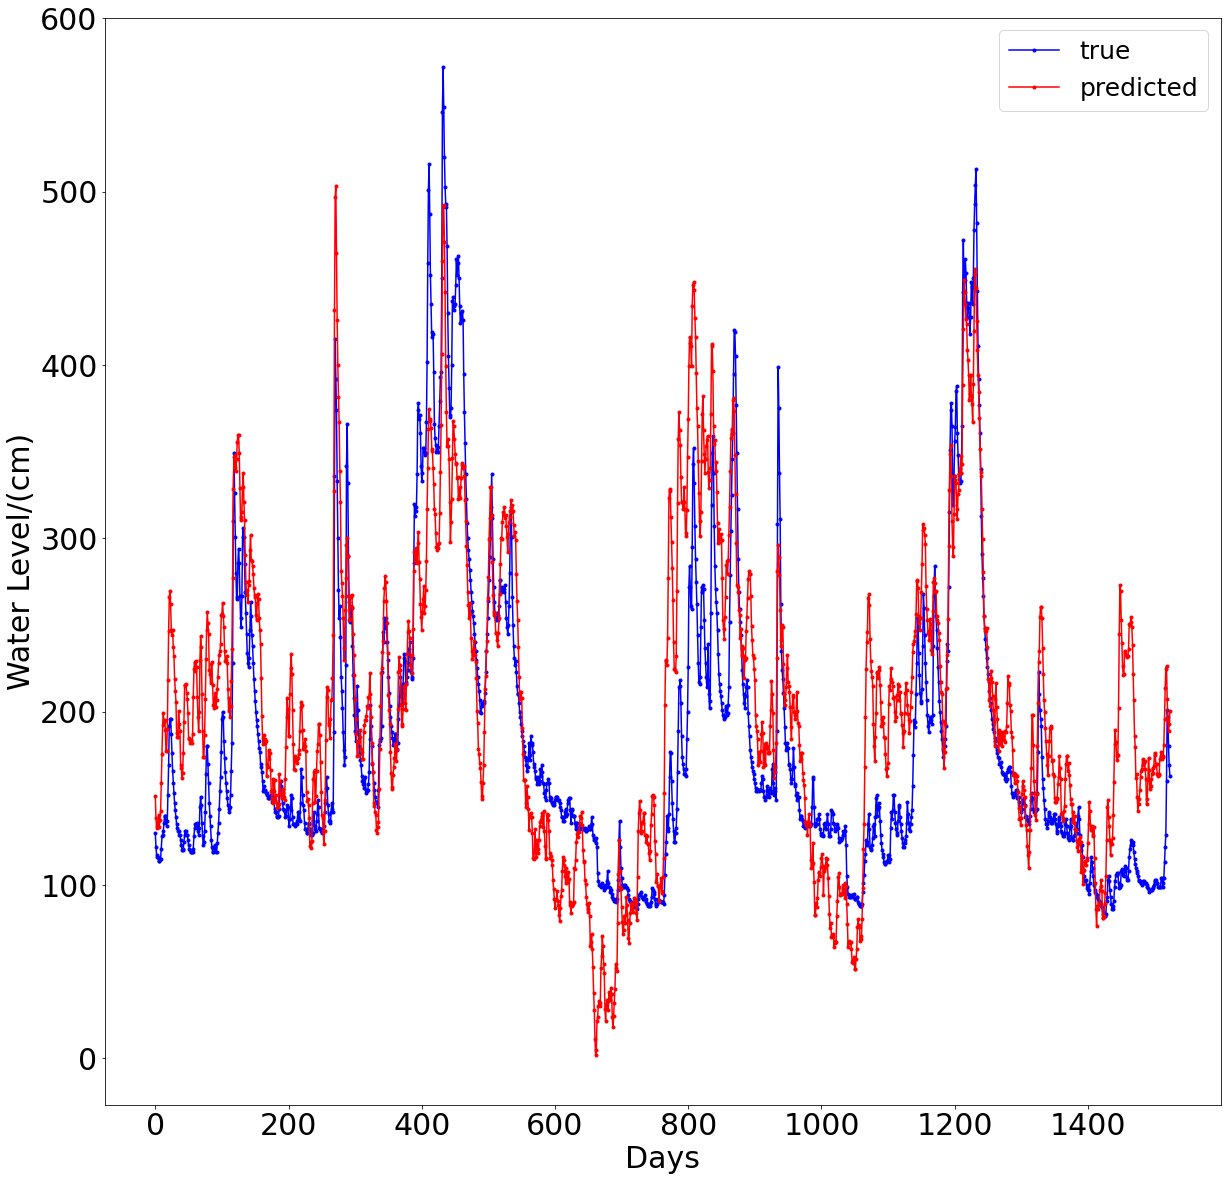

In [30]:
plotresults(y_test_mean_inv,y_pred_test_mean_inv)
# plt.savefig("Results/LR-Laggeddata")

In [31]:
pred_test_smean,pred_train_smean,error_train_smean,error_test_smean,r2score_smean=fitLRmodel(x_smean_train_standard[SMAwindow:],x_smean_test_standard,y_smean_train_standard[SMAwindow:],y_smean_test_standard)
y_train_smean_inv,y_test_smean_inv,y_pred_test_smean_inv,y_pred_train_smean_inv=convert_to_real(scaler_smean,y_smean_train_standard[SMAwindow:],y_smean_test_standard,pred_test_smean,pred_train_smean)
print(error_train_smean,error_test_smean,r2score_smean)

print("test",np.sqrt(mean_squared_error(y_test_smean_inv.flatten(),y_pred_test_smean_inv.flatten())))
print("train",np.sqrt(mean_squared_error(y_train_smean_inv.flatten(),y_pred_train_smean_inv.flatten())))




0.6647904085072972 0.7272245341635767 0.4839122287924691
test 64.02110089688499
train 58.524722171644704


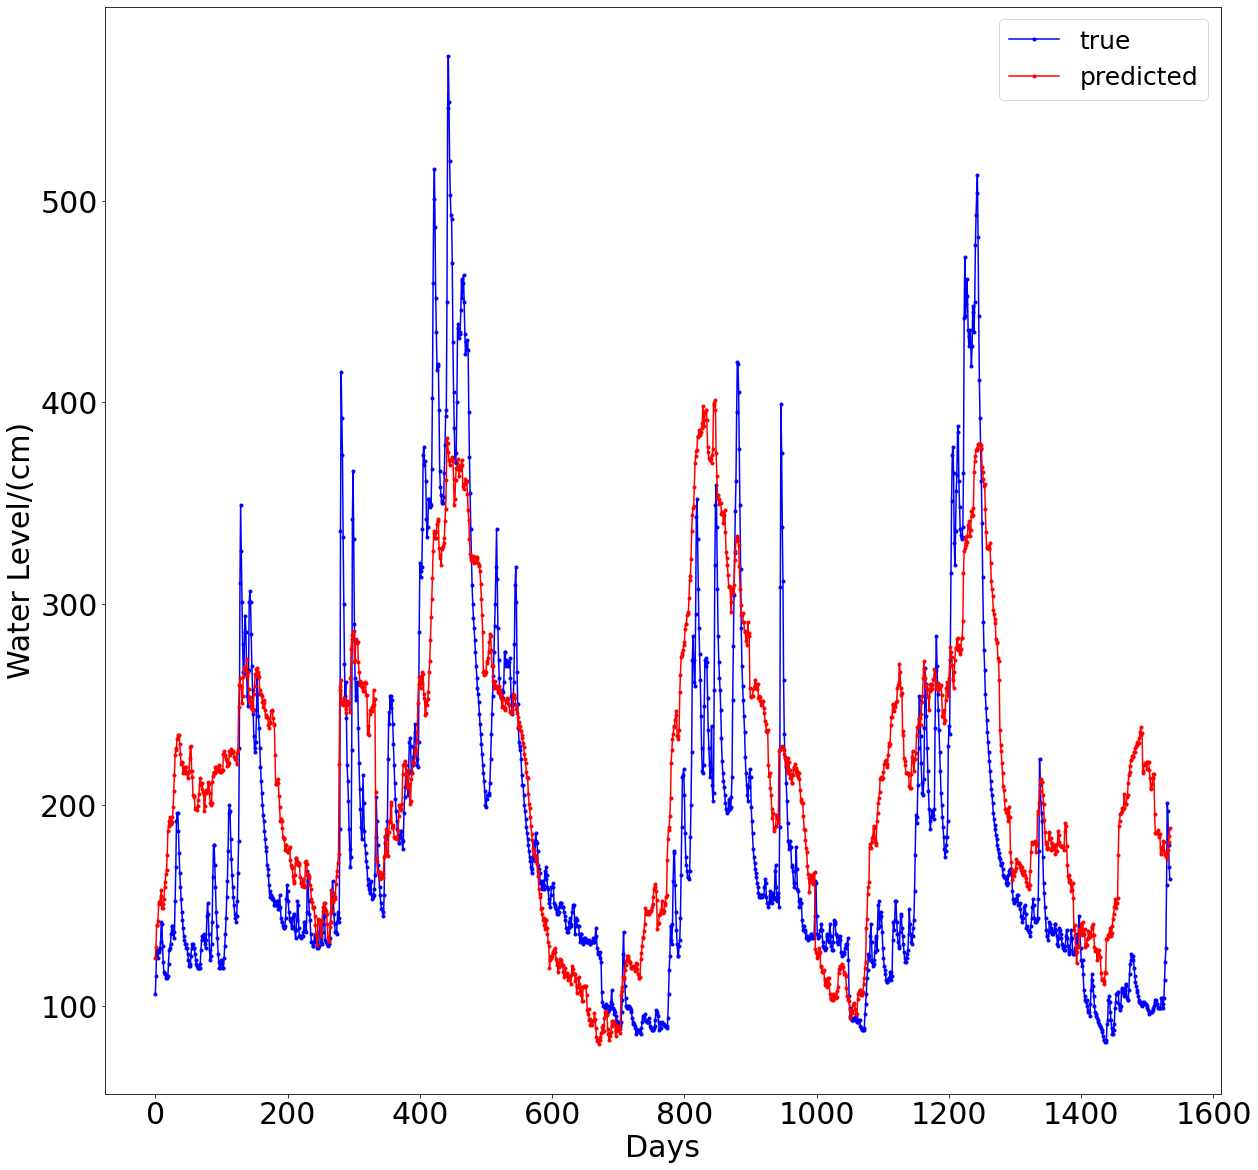

In [32]:
plotresults(y_test_smean_inv,y_pred_test_smean_inv)
# plt.savefig("Results/LR-SMAdata")

In [33]:
pred_test_wlevel,pred_train_wlevel,error_train_wlevel,error_test_wlevel,r2score_wlevel=fitLRmodel(x_train_wlevel_standard_lag,x_test_wlevel_standard_lag,y_train_wlevel_standard_lag,y_test_wlevel_standard_lag)
y_train_wlevel_inv,y_test_wlevel_inv,y_pred_test_wlevel_inv,y_pred_train_wlevel_inv=convert_to_real(scaler_wlevel_lag,y_train_wlevel_standard_lag,y_test_wlevel_standard_lag,pred_test_wlevel,pred_train_wlevel)


In [34]:
print(error_train_wlevel,error_test_wlevel,r2score_wlevel)
print("test",np.sqrt(mean_squared_error(y_test_wlevel_inv.flatten(),y_pred_test_wlevel_inv.flatten())))
print("train",np.sqrt(mean_squared_error(y_train_wlevel_inv.flatten(),y_pred_train_wlevel_inv.flatten())))


0.11478191260617943 0.09269960207172645 0.991615341546315
test 8.16087108067016
train 10.104901965458177


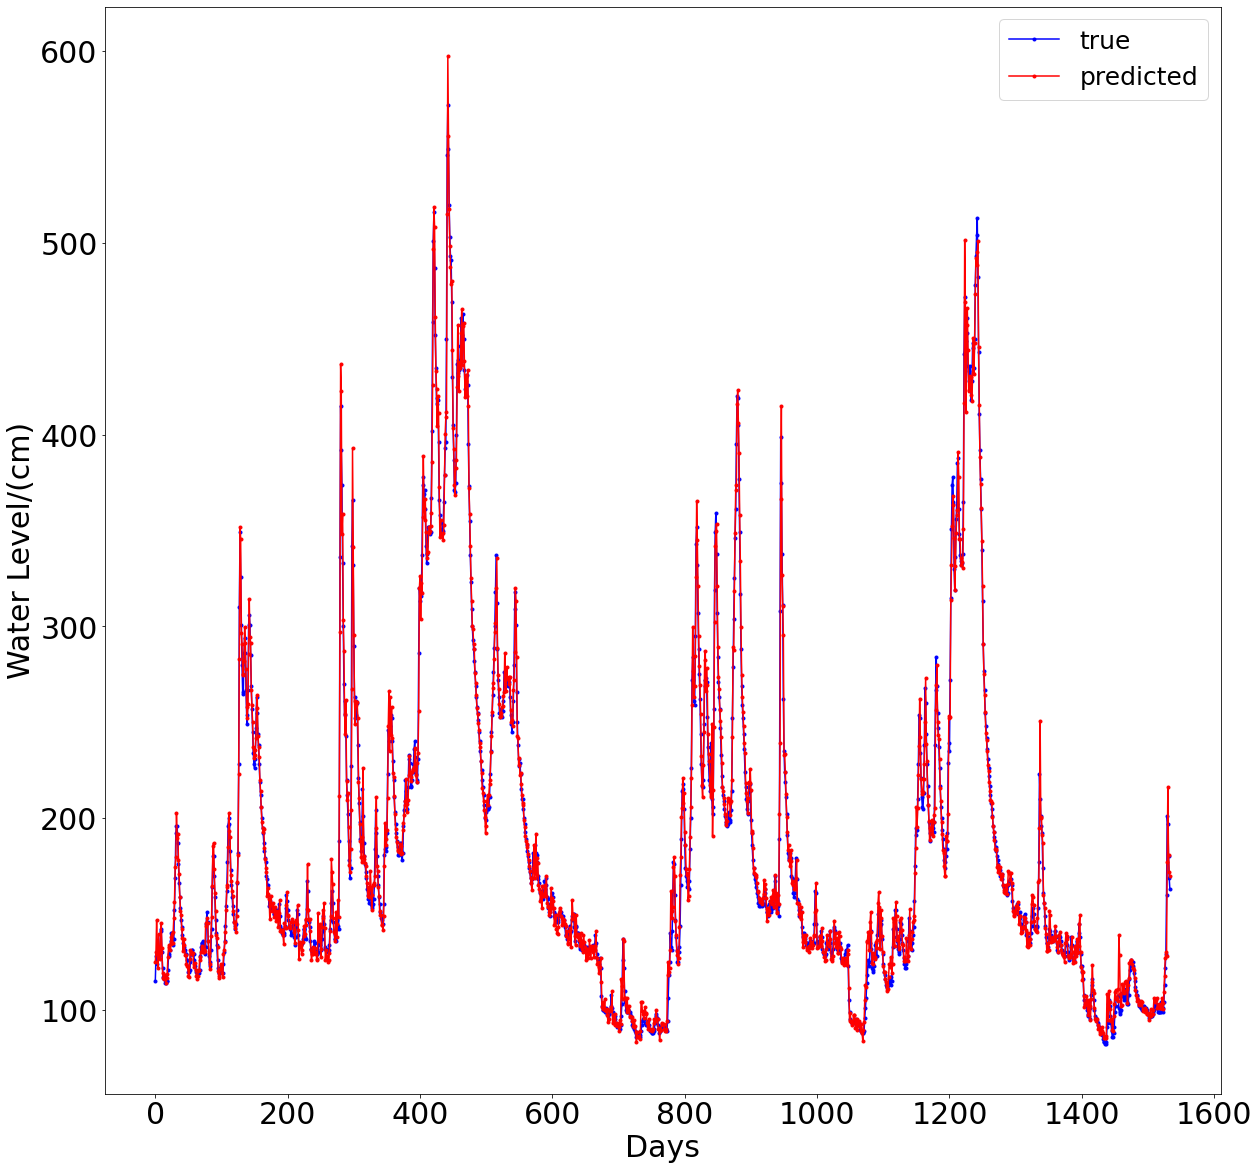

In [35]:
plotresults(y_test_wlevel_inv,y_pred_test_wlevel_inv)
# plt.savefig("Results/LR-waterlevel-lag")

<h1>Fully Connected ANN <h1>

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [37]:
def ANN(xtrain,xtest,ytrain,ytest,neur,epc):
  model = Sequential()
  model.add(Dense(neur, input_dim=xtrain.shape[1], activation='sigmoid'))
  # model.add(Dense(16, activation='sigmoid'))
  model.add(keras.layers.Dropout(rate=0.2))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=[keras.metrics.RootMeanSquaredError()])
  history = model.fit(xtrain, ytrain, epochs=epc, batch_size=32,validation_split=0.1,
                  shuffle=False)
  ypredict_test=model.predict(xtest)
  testloss=np.sqrt(mean_squared_error(ytest,ypredict_test))
  ypredict_train=model.predict(xtrain)
  trainloss=np.sqrt(mean_squared_error(ytrain,ypredict_train))
  return testloss, trainloss,ypredict_test,ypredict_train,history


def ploterrorANN(history):
  plt.figure(figsize=(20,20))
  plt.rcParams.update({'font.size': 20})
  plt.plot(history.history['root_mean_squared_error'],label='train')
  plt.plot(history.history['val_root_mean_squared_error'],label='validation')
  plt.xlabel("Epoches")
  plt.ylabel("Root Mean Square Error")
  plt.legend(prop={'size':20})
  # plt.savefig("Results/train-validation-error-ANN-SMA-data")


def plotresultsANN(actual,predicted):
  plt.figure(figsize=(20,20))
  plt.rcParams.update({'font.size': 30})
  plt.plot(actual.flatten(),'b',marker='.',label="true")
  plt.plot(predicted.flatten(),'r',marker='.',label="predicted")
  plt.ylabel("Water Level/(cm)")
  plt.xlabel("Days")
  plt.legend(prop={'size':25})
  # plt.savefig("Results/ANN-SMA-data")



def convert_to_real_ANN(scaler,y_train_standard,y_test_standard,prediction_test_standard,prediction_train_standard):
  y_train_inv=scaler.inverse_transform(y_train_standard.values.reshape(1,-1))
  y_test_inv=scaler.inverse_transform(y_test_standard.values.reshape(1,-1))
  y_pred_test_inv=scaler.inverse_transform(prediction_test_standard)
  y_pred_train_inv=scaler.inverse_transform(prediction_train_standard)
  return y_train_inv,y_test_inv,y_pred_test_inv,y_pred_train_inv


In [38]:
n1=int(2/3 * (x_mean_train_standard.shape[1]))+1
test_loss_mean_ann, train_loss_mean_ann,y_predict_test_mean_ann,y_predict_train_mean_ann,history_mean_ann=ANN(x_mean_train_standard,x_mean_test_standard,y_mean_train_standard,y_mean_test_standard,n1,16)

Epoch 1/16
172/172 [==============================] - 1s 6ms/step - loss: 2.0589 - root_mean_squared_error: 1.4115 - val_loss: 0.3124 - val_root_mean_squared_error: 0.5589
Epoch 2/16
172/172 [==============================] - 0s 2ms/step - loss: 0.7978 - root_mean_squared_error: 0.8902 - val_loss: 0.3038 - val_root_mean_squared_error: 0.5512
Epoch 3/16
172/172 [==============================] - 0s 2ms/step - loss: 0.7605 - root_mean_squared_error: 0.8692 - val_loss: 0.3201 - val_root_mean_squared_error: 0.5658
Epoch 4/16
172/172 [==============================] - 0s 2ms/step - loss: 0.6289 - root_mean_squared_error: 0.7908 - val_loss: 0.3195 - val_root_mean_squared_error: 0.5652
Epoch 5/16
172/172 [==============================] - 0s 2ms/step - loss: 0.6052 - root_mean_squared_error: 0.7750 - val_loss: 0.3196 - val_root_mean_squared_error: 0.5654
Epoch 6/16
172/172 [==============================] - 0s 2ms/step - loss: 0.5237 - root_mean_squared_error: 0.7209 - val_loss: 0.3109 - val_

In [39]:
print(test_loss_mean_ann, train_loss_mean_ann)

0.5883300637425655 0.48448468628709446


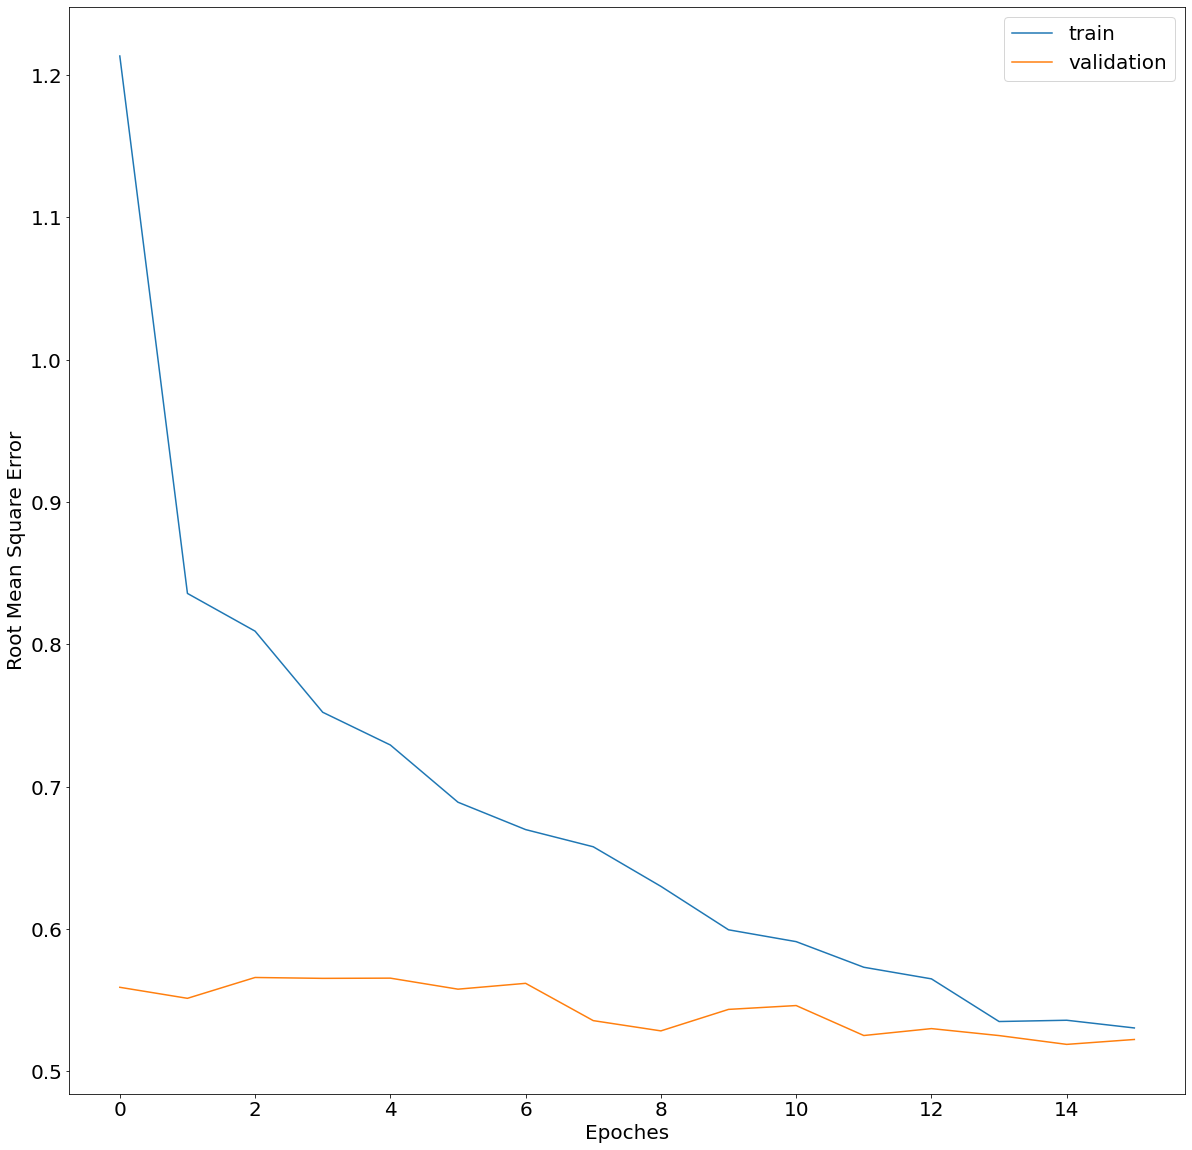

In [41]:
ploterrorANN(history_mean_ann)
# plt.savefig("Results/train-validation-ANN-laggeddata")

In [42]:
y_train_mean_inv_ann,y_test_mean_inv_ann,y_pred_test_mean_inv_ann,y_pred_train_mean_inv_ann=convert_to_real_ANN(scaler_mean,y_mean_train_standard,y_mean_test_standard,y_predict_test_mean_ann,y_predict_train_mean_ann)
print("test",np.sqrt(mean_squared_error(y_test_mean_inv_ann.flatten(),y_pred_test_mean_inv_ann.flatten())))
print("train",np.sqrt(mean_squared_error(y_train_mean_inv_ann.flatten(),y_pred_train_mean_inv_ann.flatten())))
print("r2",r2_score(y_test_mean_inv_ann.flatten(),y_pred_test_mean_inv_ann.flatten()))

test 51.66646752842393
train 42.546887131549624
r2 0.6652736118041795


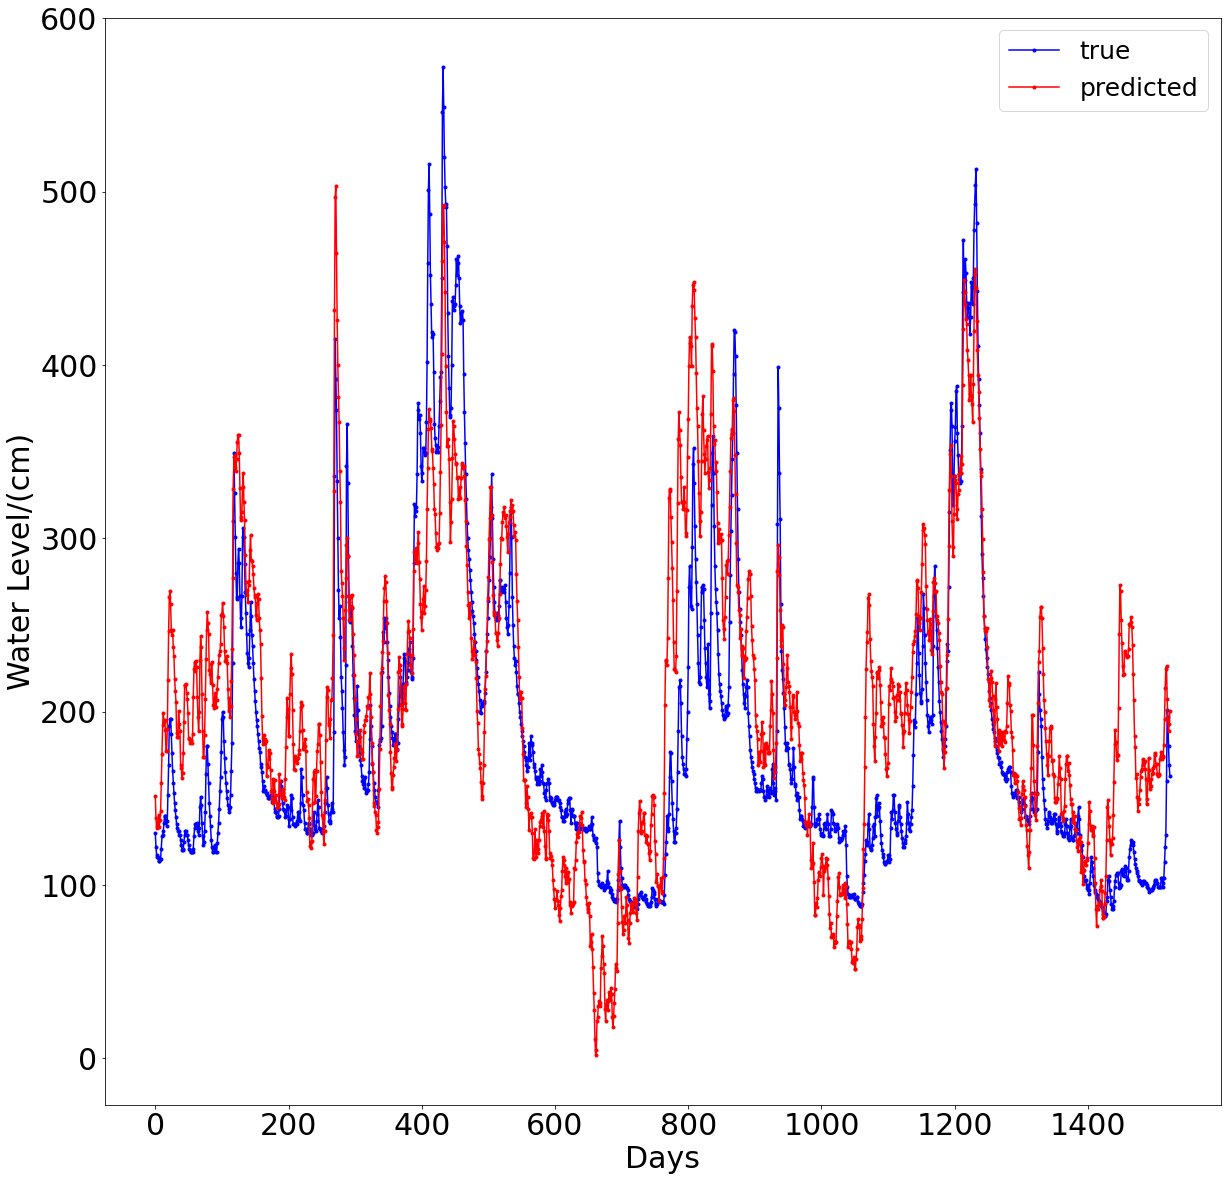

In [43]:
plotresultsANN(y_test_mean_inv,y_pred_test_mean_inv)
# plt.savefig("Results/ANN-laggeddata")

In [44]:
n2=int(2/3*(x_smean_train_standard.shape[1]))+1
test_loss_smean_ann, train_loss_smean_ann,y_predict_test_smean_ann,y_predict_train_smean_ann,history_smean_ann=ANN(x_smean_train_standard[SMAwindow:],x_smean_test_standard,y_smean_train_standard[SMAwindow:],y_smean_test_standard,n2,16)

Epoch 1/16
171/171 [==============================] - 1s 5ms/step - loss: 1.5977 - root_mean_squared_error: 1.2559 - val_loss: 0.7886 - val_root_mean_squared_error: 0.8881
Epoch 2/16
171/171 [==============================] - 0s 2ms/step - loss: 1.1400 - root_mean_squared_error: 1.0594 - val_loss: 0.4834 - val_root_mean_squared_error: 0.6953
Epoch 3/16
171/171 [==============================] - 0s 1ms/step - loss: 0.9011 - root_mean_squared_error: 0.9419 - val_loss: 0.3513 - val_root_mean_squared_error: 0.5927
Epoch 4/16
171/171 [==============================] - 0s 1ms/step - loss: 0.7941 - root_mean_squared_error: 0.8862 - val_loss: 0.2969 - val_root_mean_squared_error: 0.5449
Epoch 5/16
171/171 [==============================] - 0s 1ms/step - loss: 0.7578 - root_mean_squared_error: 0.8651 - val_loss: 0.2758 - val_root_mean_squared_error: 0.5251
Epoch 6/16
171/171 [==============================] - 0s 1ms/step - loss: 0.7085 - root_mean_squared_error: 0.8373 - val_loss: 0.2683 - val_

In [45]:
print(test_loss_smean_ann, train_loss_smean_ann)

0.7098153291008581 0.6710883737273932


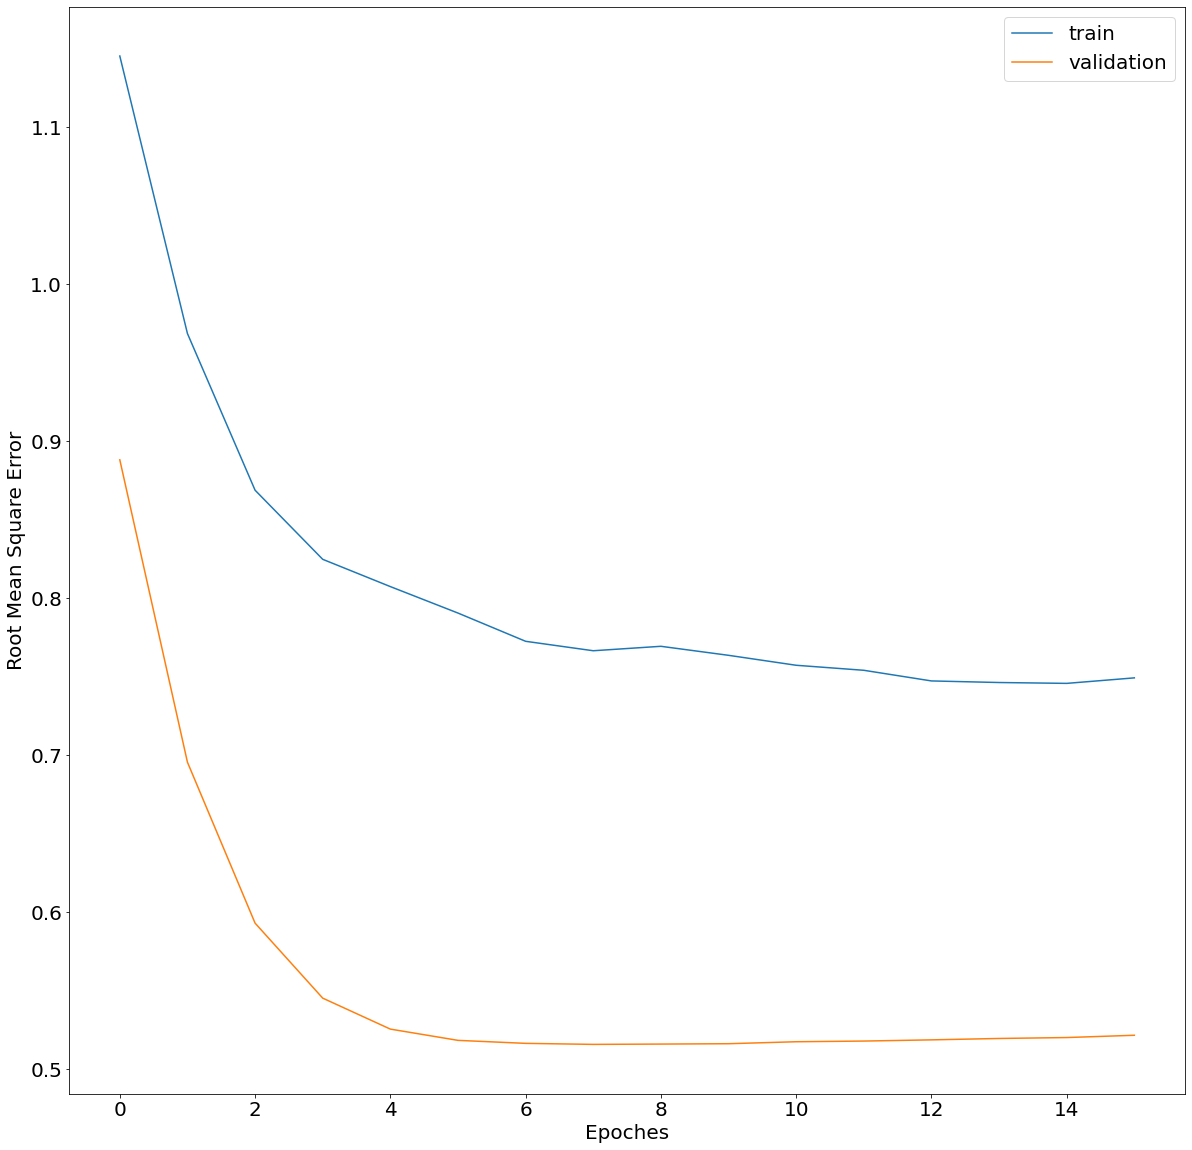

In [46]:
ploterrorANN(history_smean_ann)
# plt.savefig("Results/train-validation-ANN-sma-data")

In [47]:
y_train_smean_inv_ann,y_test_smean_inv_ann,y_pred_test_smean_inv_ann,y_pred_train_smean_inv_ann=convert_to_real_ANN(scaler_smean,y_smean_train_standard,y_smean_test_standard,y_predict_test_smean_ann,y_predict_train_smean_ann)

In [48]:
print("test",np.sqrt(mean_squared_error(y_test_smean_inv_ann.flatten(),y_pred_test_smean_inv_ann.flatten())))
print("train",np.sqrt(mean_squared_error(y_train_smean_inv_ann.flatten()[SMAwindow:],y_pred_train_smean_inv_ann.flatten())))
print("r2",r2_score(y_test_smean_inv_ann.flatten(),y_pred_test_smean_inv_ann.flatten()))

test 62.48848390588264
train 59.0791627661372
r2 0.508325971258178


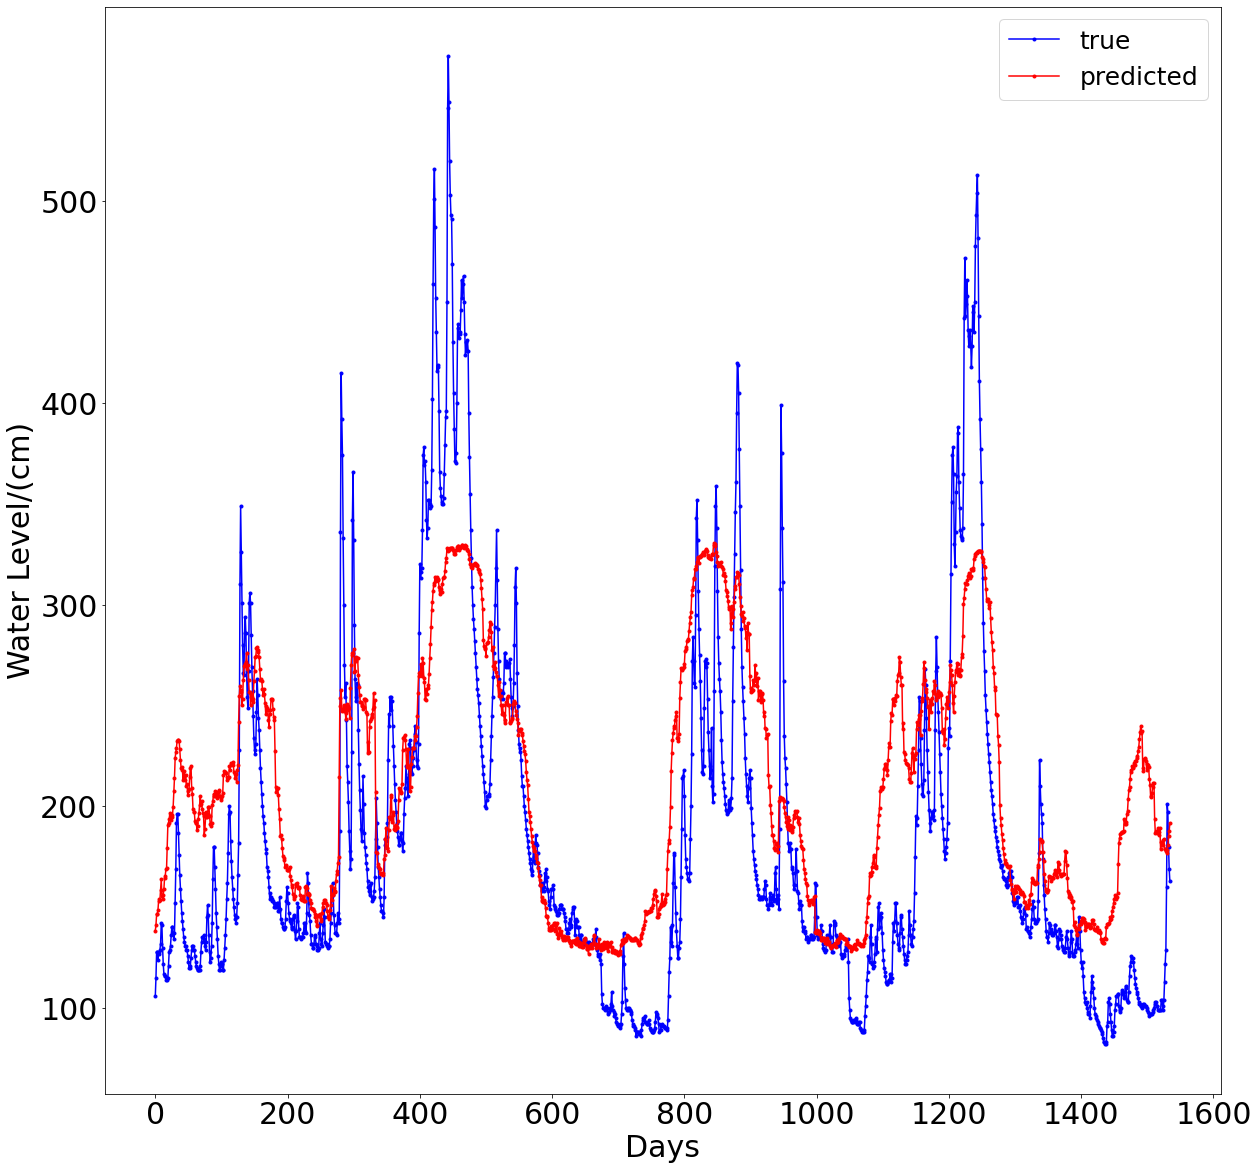

In [49]:
plotresultsANN(y_test_smean_inv_ann,y_pred_test_smean_inv_ann)
# plt.savefig("Results/ANN-SMAdata")

In [50]:
n3=int(2/3*(x_train_wlevel_standard_lag.shape[1]))+1
test_loss_wlevel_ann, train_loss_wlevel_ann,y_predict_test_wlevel_ann,y_predict_train_wlevel_ann,history_wlevel_ann=ANN(x_train_wlevel_standard_lag,x_test_wlevel_standard_lag,y_train_wlevel_standard_lag,y_test_wlevel_standard_lag,n3,30)


Epoch 1/30
173/173 [==============================] - 1s 3ms/step - loss: 1.5846 - root_mean_squared_error: 1.2466 - val_loss: 0.1877 - val_root_mean_squared_error: 0.4333
Epoch 2/30
173/173 [==============================] - 0s 2ms/step - loss: 0.4184 - root_mean_squared_error: 0.6457 - val_loss: 0.0767 - val_root_mean_squared_error: 0.2770
Epoch 3/30
173/173 [==============================] - 0s 2ms/step - loss: 0.2907 - root_mean_squared_error: 0.5383 - val_loss: 0.0419 - val_root_mean_squared_error: 0.2047
Epoch 4/30
173/173 [==============================] - 0s 2ms/step - loss: 0.2362 - root_mean_squared_error: 0.4856 - val_loss: 0.0339 - val_root_mean_squared_error: 0.1840
Epoch 5/30
173/173 [==============================] - 0s 2ms/step - loss: 0.1948 - root_mean_squared_error: 0.4410 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1735
Epoch 6/30
173/173 [==============================] - 0s 1ms/step - loss: 0.1892 - root_mean_squared_error: 0.4345 - val_loss: 0.0304 - val_

In [51]:
print(test_loss_wlevel_ann, train_loss_wlevel_ann)

0.1913487845784483 0.19235201836894428


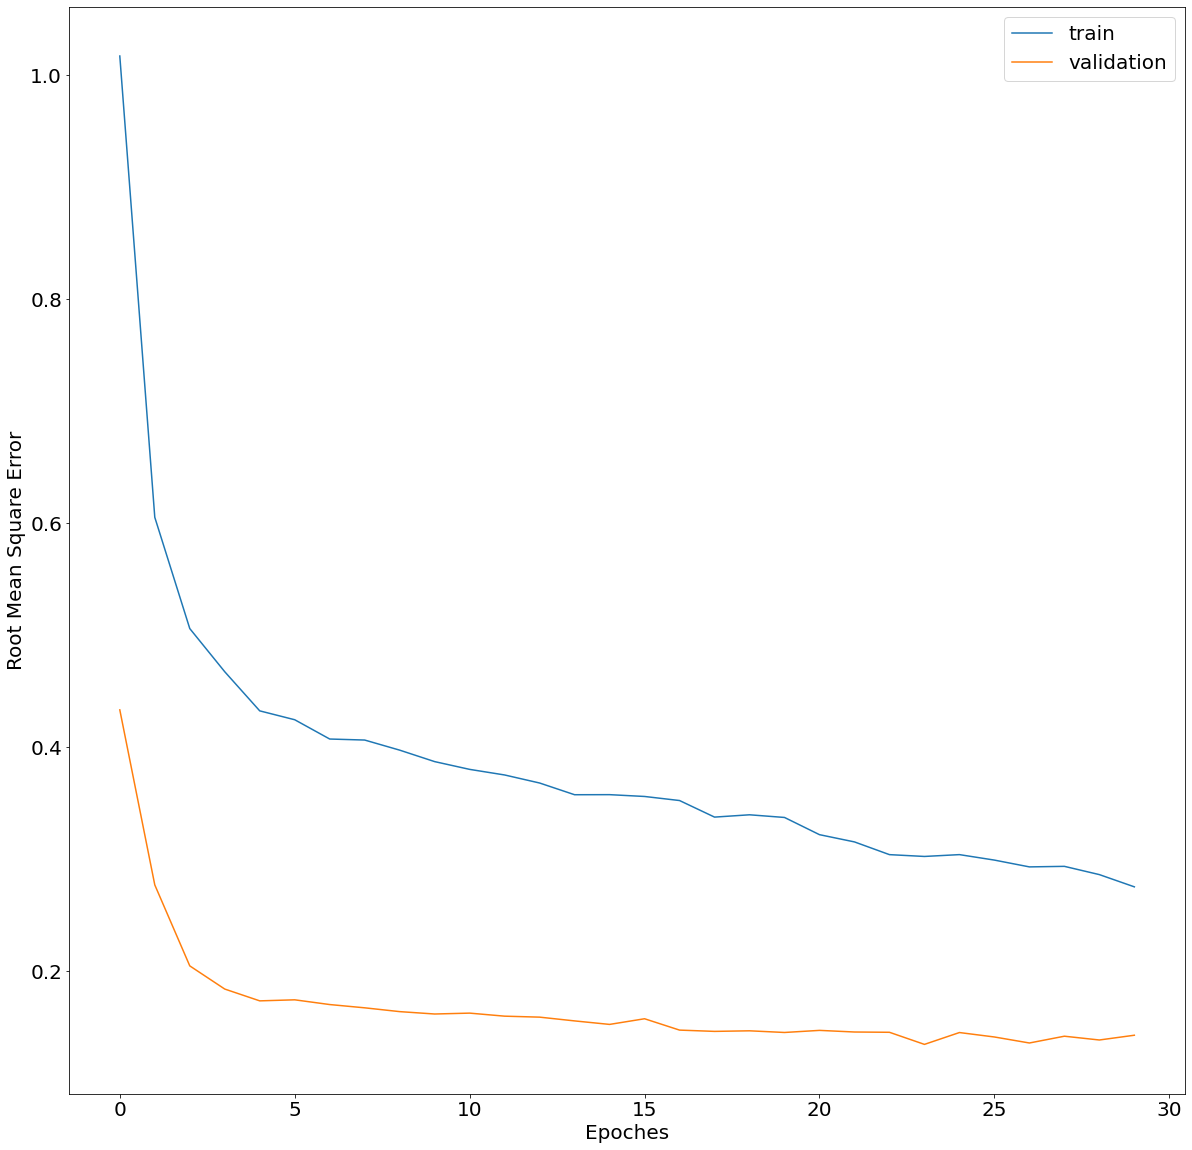

In [52]:
ploterrorANN(history_wlevel_ann)
# plt.savefig("Results/train-validation-ANN-waterleveldata")

In [53]:
y_train_wlevel_inv_ann,y_test_wlevel_inv_ann,y_pred_test_wlevel_inv_ann,y_pred_train_wlevel_inv_ann=convert_to_real_ANN(scaler_wlevel_lag,y_train_wlevel_standard_lag,y_test_wlevel_standard_lag,y_predict_test_wlevel_ann,y_predict_train_wlevel_ann)
print("test",np.sqrt(mean_squared_error(y_test_wlevel_inv_ann.flatten(),y_pred_test_wlevel_inv_ann.flatten())))
print("train",np.sqrt(mean_squared_error(y_train_wlevel_inv_ann.flatten(),y_pred_train_wlevel_inv_ann.flatten())))
print("r2",r2_score(y_test_wlevel_inv_ann.flatten(),y_pred_test_wlevel_inv_ann.flatten()))

test 16.84551738640417
train 16.933837591729414
r2 0.9642742750342922


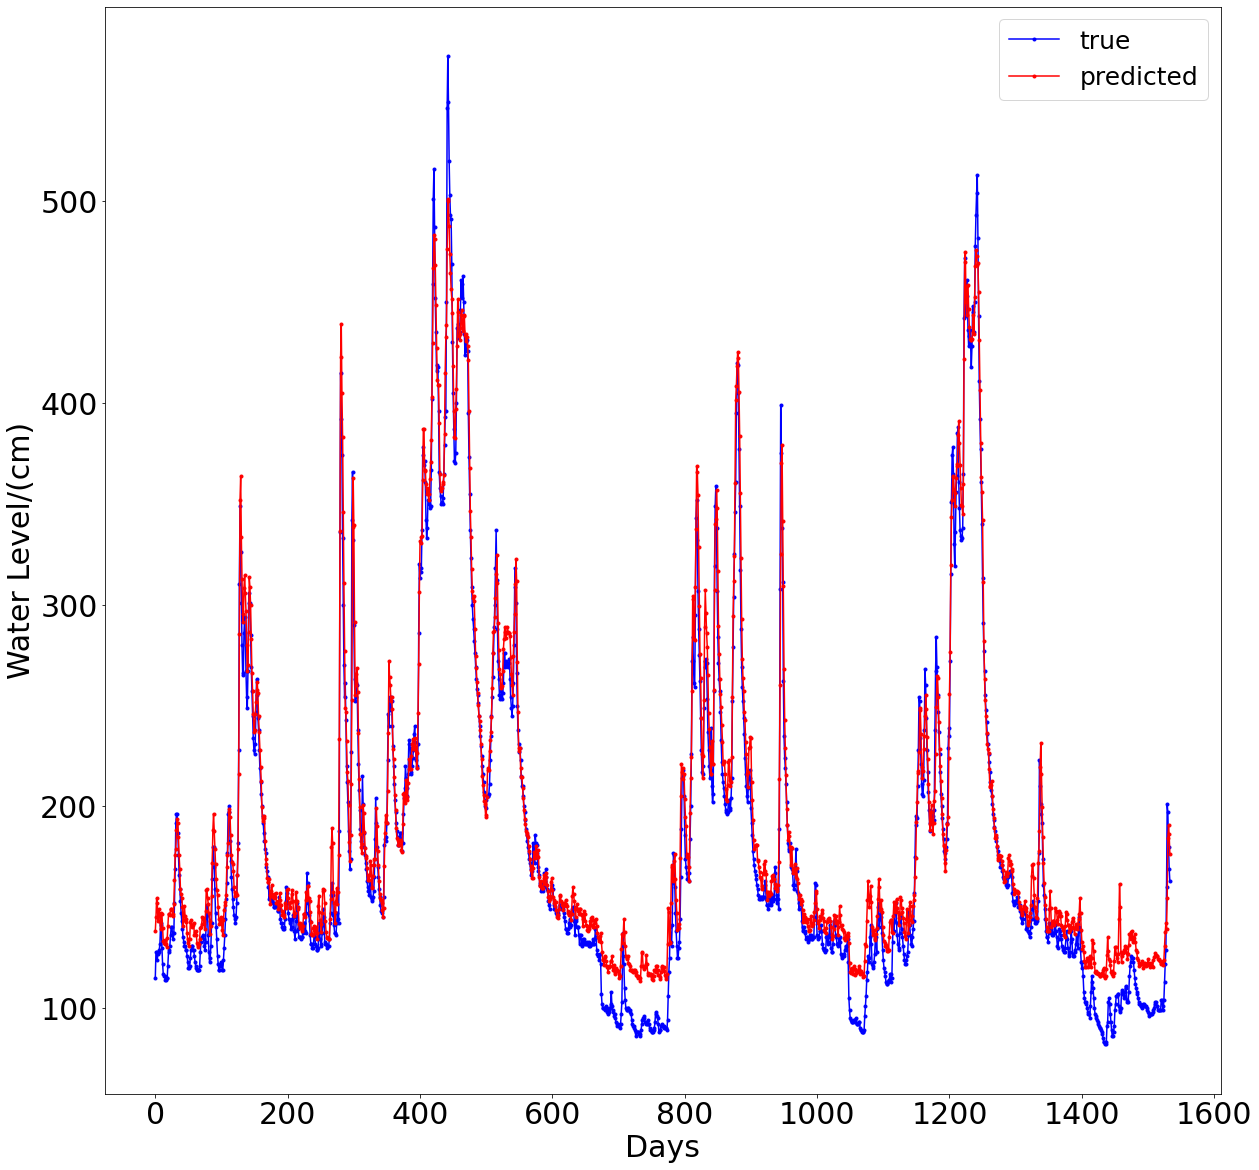

In [54]:
plotresultsANN(y_test_wlevel_inv_ann,y_pred_test_wlevel_inv_ann)
# plt.savefig("Results/ANN-waterleveldata")